# Image Compression using PCA and Feature Engineering

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
oliv=datasets.fetch_olivetti_faces()

In [4]:
oliv.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [8]:
print(oliv.data.shape)
print(oliv.images.shape)
print(oliv.target.shape)

(400, 4096)
(400, 64, 64)
(400,)


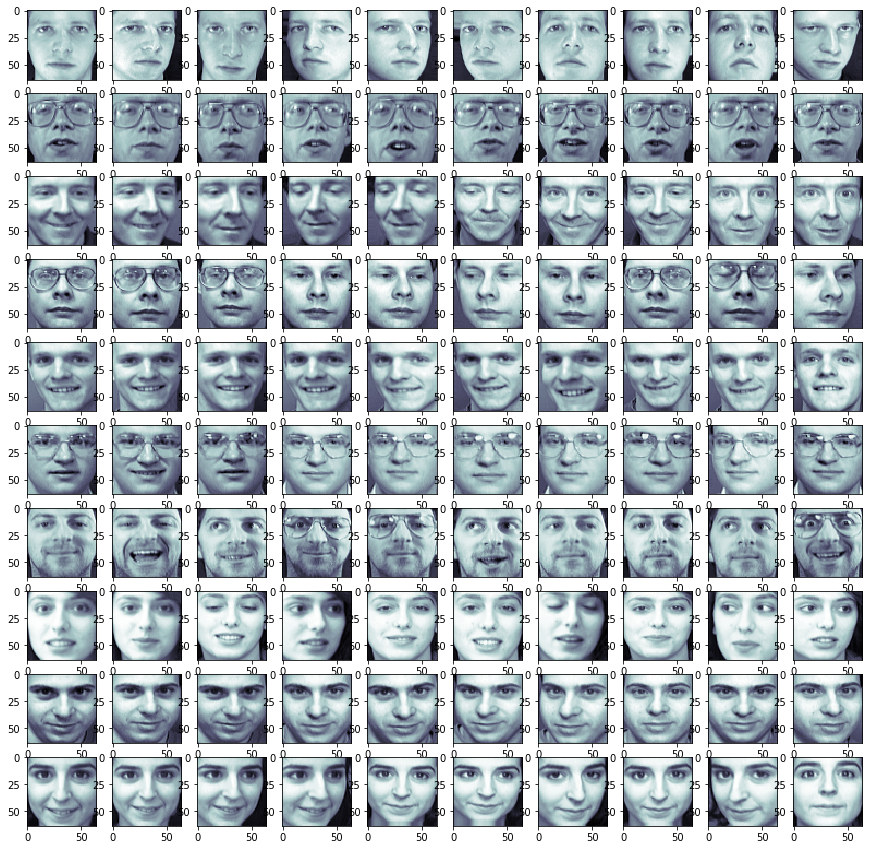

In [11]:
fig=plt.figure(figsize=(15,15))
for i in range(100):
    ax=fig.add_subplot(10,10,i+1)
    ax.imshow(oliv.images[i],cmap=plt.cm.bone)
plt.show()

In [12]:
x=oliv.data
y=oliv.target

In [13]:
pca=PCA()
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [15]:
pca.components_.shape

(400, 4096)

In [19]:
total=0
k=0
while total<0.95:
    total=total+pca.explained_variance_ratio_[k]
    k=k+1
k

123

In [20]:
pca=PCA(n_components=123,whiten=True)
transformed_data=pca.fit_transform(x)
transformed_data.shape

(400, 123)

In [21]:
x_approx=pca.inverse_transform(transformed_data)

In [22]:
x_approx.shape

(400, 4096)

In [23]:
xapprox_images=x_approx.reshape(400,64,64)

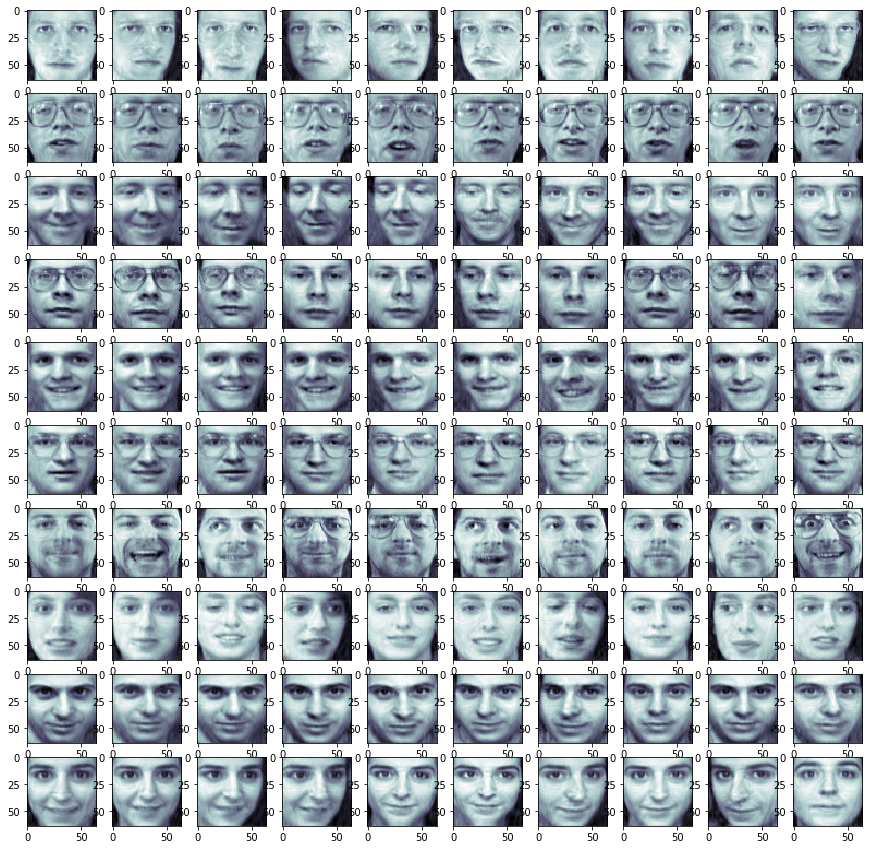

In [24]:
fig=plt.figure(figsize=(15,15))
for i in range(100):
    ax=fig.add_subplot(10,10,i+1)
    ax.imshow(xapprox_images[i],cmap=plt.cm.bone)
plt.show()

In [26]:
pca.components_.shape

(123, 4096)

In [27]:
eigenfaces=pca.components_.reshape(123,64,64)

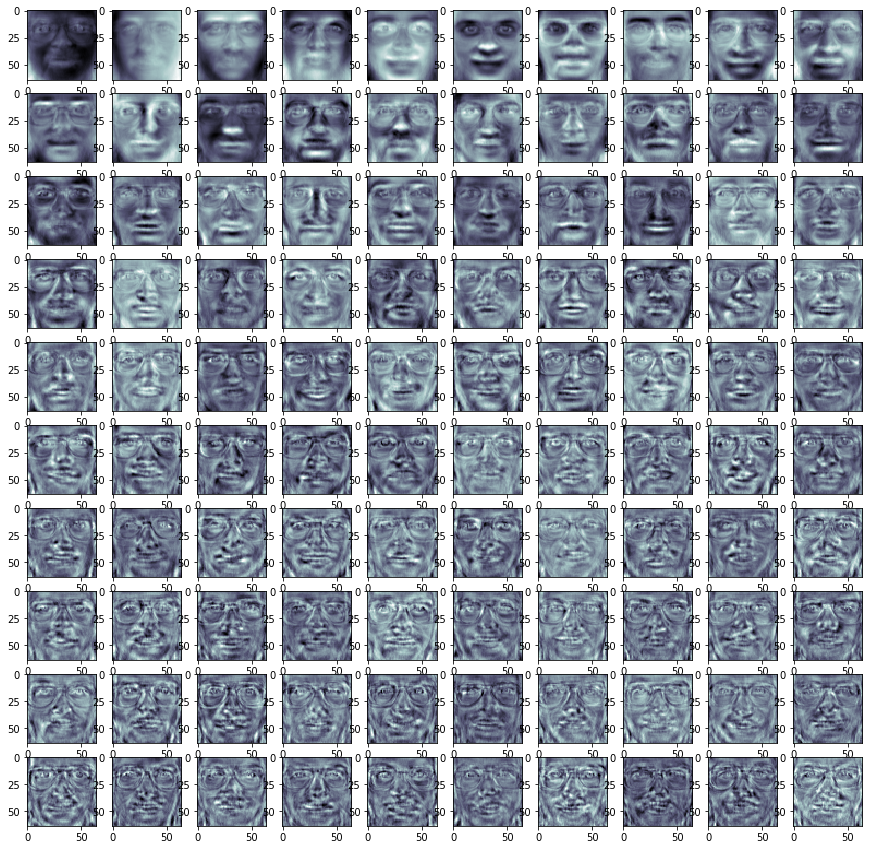

In [28]:
fig=plt.figure(figsize=(15,15))
for i in range(100):
    ax=fig.add_subplot(10,10,i+1)
    ax.imshow(eigenfaces[i],cmap=plt.cm.bone)
plt.show()

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.decomposition import PCA

In [31]:
img=mpimg.imread('yuvraj.jpg')
img.shape

(360, 480, 3)

In [33]:
temp=img.copy()

In [37]:
img_shape=img.shape
img_shape

(360, 480, 3)

In [38]:
temp.shape

(360, 480, 3)

In [42]:
temp=temp.reshape(img_shape[0]*img_shape[1],img_shape[2])

In [43]:
pca=PCA(n_components=1,whiten=True)
xtr=pca.fit(temp)
xtr=pca.transform(temp)
xtr.shape

(172800, 1)

In [44]:
xtr=xtr.reshape(img_shape[0],img_shape[1])
xtr.shape

(360, 480)

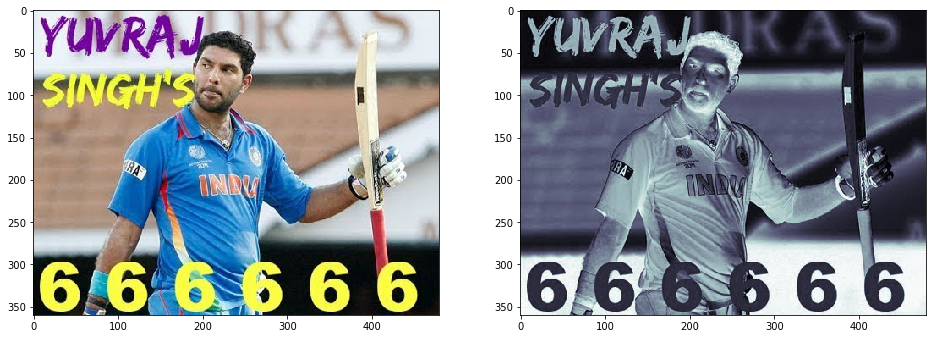

In [47]:
fig=plt.figure(figsize=(16,16))
ax=fig.add_subplot(2,2,1)
ax.imshow(img,cmap=plt.cm.bone)
ax=fig.add_subplot(2,2,2)
ax.imshow(xtr,cmap=plt.cm.bone)
plt.show()

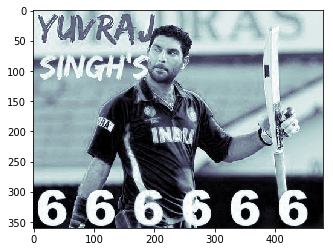

In [51]:
plt.imshow(img[:,:,0],cmap=plt.cm.bone)
plt.show()